In [7]:
!pip install nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')

In [0]:
import nltk

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
# ensure cleaning.py is in the same directory
from cleaning import clean_text
from nltk import word_tokenize
from nltk.util import ngrams  
from heapq import nlargest
import collections

In [0]:
df = pd.read_csv('sexual_violence_twitter.csv')

In [12]:
df.head()

,Unnamed: 0,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls,user_location,month
0,0,VipinHeartsTay,NaN,The fact their might be so many marital rape a...,0,10,1,1255927001006903297,https://twitter.com/VipinHeartsTay/status/1255...,2875165356,2020-04-30 18:28:25+00:00,Thu Apr 30 18:28:25 +0000 2020,NaN,NaN,NaN,NaN,India,4
1,1,TheGhoudi,NaN,"‘If the child has been through sexual abuse, a...",2,3,1,1255805741769715712,https://twitter.com/TheGhoudi/status/125580574...,822838819359690754,2020-04-30 10:26:35+00:00,Thu Apr 30 10:26:35 +0000 2020,NaN,@TanujaSodhi,NaN,NaN,"Mumbai, India",4
2,2,TheGhoudi,NaN,‘If you have any doubt & pick up any signs of ...,0,6,1,1255802654543892480,https://twitter.com/TheGhoudi/status/125580265...,822838819359690754,2020-04-30 10:14:19+00:00,Thu Apr 30 10:14:19 +0000 2020,#ChildrenAndCovid19,@Arpan_CSA,NaN,https://bit.ly/preventingCSA_lockdown,"Mumbai, India",4
3,3,iamwanderlas,NaN,"FUCCBOIS 8/10: a great film and yeah, it talks...",0,2,1,1255749452649730048,https://twitter.com/iamwanderlas/status/125574...,849866014825209856,2020-04-30 06:42:54+00:00,Thu Apr 30 06:42:54 +0000 2020,NaN,NaN,NaN,NaN,Lost,4
4,4,livevideohotcha,NaN,#Lockdown New Time Zone for #Sexual Couples......,0,2,2,1255717581387960324,https://twitter.com/livevideohotcha/status/125...,1228690520907689985,2020-04-30 04:36:16+00:00,Thu Apr 30 04:36:16 +0000 2020,#Lockdown #Sexual,NaN,NaN,NaN,"Mumbai, India",4


In [13]:
def formated_hashtags(hashtag):
  if pd.isnull(hashtag):
    return 'None'
  else:
    return hashtag

df['hashtags'] = df['hashtags'].apply(formated_hashtags)
df['hashtags']

0                                None
1                                None
2                 #ChildrenAndCovid19
3                                None
4                   #Lockdown #Sexual
                    ...              
6749    #TrumpRapist #TrumpPaedophile
6750                             None
6751                             None
6752                             None
6753                  #BoysLockerRoom
Name: hashtags, Length: 6754, dtype: object

In [14]:
hashtags_frequency = {}

for hashtag in df['hashtags']:
  list_of_hashtags = hashtag.split(' ')

  for tweets in list_of_hashtags:
    if tweets not in hashtags_frequency:
        hashtags_frequency[tweets] = 0
    else:
        hashtags_frequency[tweets] += 1

print(sorted(hashtags_frequency.items(), key = 
             lambda kv:(kv[1], kv[0])))  


[('#138crorepledge2020', 1), ('#14FebParentsWorshipDay', 1), ('#1humanfamily', 1), ('#2020primaries', 1), ('#20Mforcarryminati', 1), ('#20Mlikesforcarry', 1), ('#21daylockdown', 1), ('#50YearsOfCelebration', 1), ('#5DemandsNot1Less', 1), ('#ACID_ATTACK', 1), ('#AISA', 1), ('#AISAJamia', 1), ('#AMAZONPrimeIndia', 1), ('#APhighcourt', 1), ('#Acceptance', 1), ('#AlterCebu', 1), ('#AlterManila', 1), ('#AmazonOriginal', 1), ('#AmazonPrimeVideoIN', 1), ('#Andhra_Pradesh', 1), ('#AnjanaHareesh', 1), ('#AnnSophieM', 1), ('#Anti_Indian', 1), ('#AnushkaSharma', 1), ('#ArnabGoswami', 1), ('#ArpanWarriors', 1), ('#ArrestFaizal', 1), ('#ArrestFaizalSiddiqui', 1), ('#ArtificialIntelligence', 1), ('#AskNCW', 1), ('#Athletes', 1), ('#AuratAzadiMarchSukkur', 1), ('#AuratonKaInquilab', 1), ('#Ayanavaram', 1), ('#B4BedKiNOZE', 1), ('#BAC9', 1), ('#BAN_TIKTOK', 1), ('#BBC', 1), ('#BJP4Delhi', 1), ('#BJPHitlerRaj', 1), ('#BJPMostCorruptDepartment', 1), ('#BanConversionTherapy', 1), ('#BanLiquorSale', 1), (

The Most commom hashtashs used in tweets about sexual harrasment or  violence are:
1. #BanTikTokIndia, 779
2. #BanTikTok, 607
3. #IslamicLawForRapist, 447 
4. #IndiaKillingYouth_IOK, 27
5. #BatasSaPusongBatas, 27 comments

In [15]:
#Using Harshita cleaning program!
# Cleaning text
clean_text(df,'text')

# Delete duplicates on the basis of same processed text
df.drop_duplicates(subset = "processed_text", inplace=True)
df.reset_index(drop=True, inplace=True)

print('Now shape of data = ', df.shape)

Cleaning text and adding column 'processed_text'
DONE! 

Now shape of data =  (3049, 19)


In [16]:
i = 1
for text in df['processed_text']:
  print(f'{i}) {text}')
  i += 1


1) fact might many marital rape sexual assault within home taking place right greater rate one wont talking bcz corona
2) ‘if child sexual abuse adult parent give child space amp pushy make feel like end world please tell never fault also seek help therapist counsellor tanujasodhi
3) ‘if doubt pick sign sexual abuse child make sure conversation child show open channel communication say pooja arpan csa childrenandcovid19
4) fuccbois 8 10 great film yeah talks politics abuse authority blackmail sexual exploitation amp friendship mundane porn pool scene expect devour deep one ph good film must say
5) lockdown new time zone sexual couple
6) pocso act accused 29 years age incident take place habitual offender criminal sexual intercourse consensual nature though victim attain age consent kidnapping sentence reduce bombay
7) mag papageant ka pa din ba kahit bi kana — believe people regardless sexual orientation deserve equal opportunity stage
8) ano kinalaman ng sexual preference mo sa physic

# EDA

Creating wordcloud...


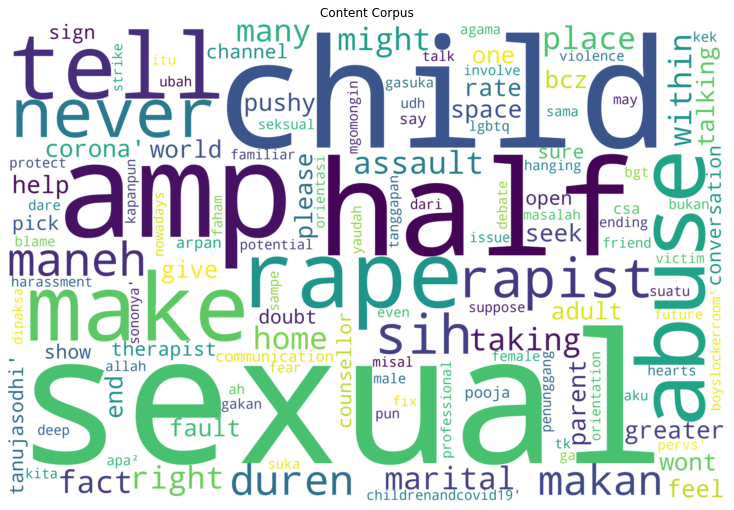

In [39]:
# Getting insights by creating a wordcloud

def make_wordcloud(col):
    print('Creating wordcloud...')
    contentCorpus = col.values
    wordcloud = WordCloud(background_color = 'white', width = 3000, height = 2000, max_words=750).generate(str(contentCorpus))
    fig = plt.figure(figsize = (10, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title('Content Corpus')
    plt.show()

make_wordcloud(df['processed_text'])

Looking at the word cloud, most words are expected, as our scope is domestic violence, which includes physical, sexual, and psychological. It is important to note that we have several terms in other languages ​​that occur in India.

## No. Of Positive  Sentiments vs Non. of Negatives Sentiments.

Let's look at the distribution of positive (if have) and negative tweets, based on the SentimentIntensityAnalyzer from the NLTK Vader-Lexicon library, that examines the sentiment of a sentence, on how positivem neutral, or negative.

The analyser returns 4 scores, positive, negative, neutral and compound.

Note that compound score, returns the overral of sentiment of a sentence with a range of [-1,1]. For our current purpose, we classify each tweet into 5 classes using the 'compound' score.
We will assign a rangee of values for each class:
1. Very Positive - [0.60, 1]
2. Positive - [0.10,0.60)
3. Neutral - (-0.10, 0.10)
4. Negative - (-0.60, -0.10]
5. Very Negative - [-1.0, -0.60]

In [45]:
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:

# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

# Apply polarity_score method of SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_text'].apply(lambda x: sid.polarity_scores(x))

# Keep only the compound scores under the column 'Sentiment'
df = pd.concat([df.drop(['sentiment'], axis = 1), df['sentiment'].apply(pd.Series)], axis = 1)

In [0]:
def get_sentimental_label(val):
  if (val <= 1.0 and val >= 0.6):
    return 'Very Positive'
  elif (val < 0.6 and val >= 0.10):
    return 'Positve'
  elif (val < 0.10 and val > - 0.10):
    return 'Neutral'
  elif ( val <= -0.10 and val > - 0.55):
    return 'Negative'
  else:
    return 'Very Negative'

df['sentiment_class'] = df['compound'].apply(get_sentimental_label)

In [52]:
df['sentiment_class']

0       Very Negative
1             Positve
2       Very Negative
3       Very Positive
4             Neutral
            ...      
3044          Positve
3045    Very Negative
3046    Very Negative
3047    Very Negative
3048          Positve
Name: sentiment_class, Length: 3049, dtype: object

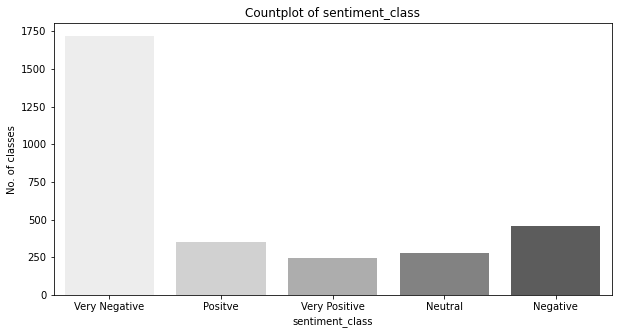

In [58]:
import seaborn as sns

# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('Greys')
sns.countplot(df['sentiment_class'])
plt.title('Countplot of sentiment_class')
plt.xlabel('sentiment_class')
plt.ylabel('No. of classes')
plt.show()

So, we noticed that the average of tweets is very negative and a small amount of tweets is very positive, which can be a little strange, due to the seriousness of this topic.

Let's look for some examples of Very Negative tweets and Very positive ones.

In [69]:
# Display full text in Jupyter notebook:
pd.set_option('display.max_colwidth', -1)
df[(df['sentiment_class'] == 'Very Negative')].sample(n=20)[['text', 'sentiment_class']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,text,sentiment_class
1300,"#tiktokexposed Totally waste of time Promoting religious abuse, + sexual contents , animal abuse , and many issues are found So please #UninstallTikTok",Very Negative
279,"#Kashmir is the world’s most militarized zone where extrajudicial killings have become part of a vicious cycle of state violence. For decades, heavy presence of #India ’s armed forces rendered thousands of deaths and disappearances, along with sexual violence and tortures.",Very Negative
50,@anti_padunism isko report kro as a spam and spread karo aage but sabko bolna report m select kare as a spam do that jb sab same options select kartee ge iska account band ho... Yeh pakistani account humare gods ko abuse aur sexual pics upload kar raha hai @ZeeNews @PMOIndia,Very Negative
1679,"Watched so many trending videos on #bantiktok and I'm shocked and disturbed at the same time. Wtf is wrong man? Have you people completely lost the ability to think? Things like acid attack, religion abuse, sexual content, animal cruelty seems funny to you? Wake up and stop it.",Very Negative
827,Please sir I promise that I always want to become investigation and interview and debate and interaction social media so that will be proved disgraceful and hiding something comes out and medical tests for rape or sexual violence any where and any time I don't fear jail and hung,Very Negative
188,"Sad no one speaks about Sexual abuse &amp; Assaults anymore. . So I’m leaving this booklet, A self-help guide for survivors of rape &amp; sexual assaults https://www.kch.nhs.uk/Doc/pl%-%.%-%a%self-help%guide%for%survivors%of%rape%and%sexual%assault.pdf",Very Negative
1739,#BanTiktok #TTKMKB #BanTikToklnlndia - sexual content - Chinese app meaning zero security. - communal hatred -rape threats. - meaning less contents. #TTKMKB pic.twitter.com/tAogualpO,Very Negative
487,This “میرا جسم میری مرزی” has been portrayed as if WOMEN want to roam around the streets naked. IT IS NOT ABOUT THAT!! It’s about consent. It’s about rape. Marital rape. Harassment Sexual assault. Acid throwing. Etc.,Very Negative
200,"@GwynethPaltrow @priyankachopra @Grimezsz Berni’s dropped out. Biden’s accused by women of sexual misconduct, &amp; shows signs of cognitive decline Trump is now openly killing nay murdering Americans. With Fox News hosts openly touting hydroquoloroquin as a cure for COVID- / – at Madras Club",Very Negative
2953,Bois Locker Room News: ‘Sidharth’ is actually a girl; fake account used to suggest plan for sexual assault | Delhi News - Times of India https://timesofindia.indiatimes.com/city/delhi/sidharth-is-actually-a-girl-fake-account-used-to-suggest-plan-for-sexual-assault/articleshow/.cms Read it,Very Negative


In [68]:
df[(df['sentiment_class'] == 'Very Positive')].sample(n=10)[['text', 'sentiment_class']]

,text,sentiment_class
1942,Don't tell me it hasn't treated men as mere objects for sexual gratification of women. Wonder why women like you refuse to highlight objectification of men in porn,Very Positive
1181,Aweee that's really sweet to hear also it's alright I'm quite used to hearing my own parents talk badly about the LGBTQ+ community I kinda already knew that they'll disown me someday once I move out of their house and explore my sexual orientation hahaha,Very Positive
377,I asked the girls in the event today: Do you all remember those Tamil films in which the hero will slap the heroine who expresses her sexual feelings asking if she is even a woman followed by a lengthy lesson as to how to behave like a proper woman?,Very Positive
2719,"I truly support sex education in schools. Bukan promote sex, benda ni x payah diajar. We want kids to know what is an ok touch and what is not. Yg menggandung pun x lah sampai campak baby dari tingkap. Mangsa rogol or sexual abuse pun dapat perlindungan yg sewajarnya!",Very Positive
1077,"Well to be frank, the largest hotel chain in the world should have better training on things like gender and sexual orientation assumptions, so maybe blacking out the name shouldn’t have been done.",Very Positive
1702,@GooglePlay Did you support this kind of sexual content through one of the app available at play store ??,Very Positive
214,North Country () Based on true story. Starring Charlize Theron. It’s a good movie. Women files sexual harrassment class action lawsuit against their company where it has never been done before. Masa ni takde policy to protect women’s right. pic.twitter.com/kmqcqmTjB,Very Positive
2560,"We have a chance to do something extraordinary As we head out of this pandemic we can change the world.Create a world of love.A world where we are kind to each other.A world were we are kind no matter what class,race,sexual orientation,what religion or lack of or what job we have",Very Positive
928,#Lovesimon Such a pleasant story telling with so blissful bgm and camera work.. How a guy survived his severe struggle since longtime due to his sexual orientation.. Screenplay and performances are best part.. Loved the last min which filled wih many emotions,Very Positive
2500,@TechnicalGuruji hello sir please help me ..I have k subscribers on my channel .but recently YouTube suspended my channel cause Sexual content.But my content was % Finance Content without any strike mail YouTube Delete My Channel https://www.youtube.com/channel/UCfXdDGafkr_sBRBeqYbw Please help me sir,Very Positive


In [59]:
all_text = ' '.join(str(word) for word in df.processed_text.values) 
tokens = word_tokenize(all_text)
    
unigrams = ngrams(tokens, 2)
unigrams = collections.Counter(unigrams).most_common(15)
unigrams

[(('sexual', 'abuse'), 668),
 (('sexual', 'content'), 366),
 (('sexual', 'harassment'), 342),
 (('sexual', 'orientation'), 336),
 (('sexual', 'assault'), 267),
 (('sexual', 'violence'), 267),
 (('child', 'sexual'), 243),
 (('acid', 'attack'), 199),
 (('rape', 'sexual'), 154),
 (('promote', 'acid'), 124),
 (('rape', 'threat'), 108),
 (('child', 'abuse'), 81),
 (('community', 'abuse'), 77),
 (('sexual', 'exploitation'), 76),
 (('4', 'sexual'), 76)]

# CountVectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


In [60]:
count_vectorizer = CountVectorizer()
df_counts = count_vectorizer.fit_transform(df['processed_text'])

words_idx = sorted([count_vectorizer.vocabulary_.get(f"{word.lower()}") for word in [u"sexual", u"violence", u"abuse",u"orientation",u"harrasment",u"child",u"woman",u"rape",u"psychological",u"family", u'report', u"victim", u"lockdown"]])

key_words_count_df = pd.DataFrame(df_counts[:, words_idx].toarray(), columns=np.array(count_vectorizer.get_feature_names())[words_idx])


key_words_count_df

,abuse,child,family,harrasment,lockdown,orientation,psychological,rape,report,sexual,victim,violence,woman
0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,1,2,0,0,0,0,0,0,0,1,0,0,0
2,1,2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,0,0,0,0,0,1,0,0,0,1,0,0,0
3045,1,0,0,0,0,0,0,0,0,1,0,0,0
3046,0,0,0,0,0,0,0,0,0,1,0,1,0
3047,0,0,0,0,0,0,0,1,0,1,1,0,0


Let's checkout some rows 

In [22]:
abuse_columns = key_words_count_df[key_words_count_df['family'] == 1]
abuse_columns = abuse_columns[abuse_columns['lockdown'] == 1].index
i = 1
for text in df['processed_text'].iloc[abuse_columns]:
  print(f"{i}) {text}")
  i += 1

1) lockdown blues kounch alkushi cowhage variety bean family seed use ayurvedic remedy male sexual weakness fearsome quality konch bean
2) ngo partner margadarshi society kalaburagi identify family nomadic tribe widow struggle lockdown distribute food package provide awareness risk traffic ways keep woman child safe sexual exploitation
3) lockdown child going alot trauma house every day going sexual amp physical abuse family member child helpline number 1098 many unaware want spread awareness


In [23]:
abuse_columns = key_words_count_df[key_words_count_df['victim'] == 1].index
i = 1
for text in df['processed_text'].iloc[abuse_columns]:
  print(f"{i}) {text}")
  i += 1

1) pocso act accused 29 years age incident take place habitual offender criminal sexual intercourse consensual nature though victim attain age consent kidnapping sentence reduce bombay
2) peace violence ngo us develop denim day campaign response case activism surround since campaign bring awareness victim blame destructive myth surround sexual violence grow movement
3) itu lg ramai bgt kok cewe playing victim kena pelecehan sexual
4) security council woman child 24 x 7 centre render justice woman amp child victim sexual harassment crime call 9480 436700 936700
5) ate girl know important must fight cease action sexual predator expense victim mental health also worth dare disrespect fellow woman choose peace first battle everyone
6) grabe girl experience sexual assault physical intimacy always consent never force rape joke dili niya deserve ang peace victim heal
7) respect cpo faisalabad decorate officer wish victim sexual violence child woman kill way well do captain capt r sohail cpo f

## TF-IDF


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer


In [25]:
tfid_transformer = TfidfTransformer()
df_tfidf = tfid_transformer.fit_transform(df_counts)

pd.DataFrame(df_tfidf[:, words_idx].toarray(), columns=np.array(count_vectorizer.get_feature_names())[words_idx])

,abuse,child,family,harrasment,lockdown,orientation,psychological,rape,report,sexual,victim,violence,woman
0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.109879,0.0,0.041095,0.000000,0.000000,0.0
1,0.077237,0.196632,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.035357,0.000000,0.000000,0.0
2,0.081905,0.208518,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.037494,0.000000,0.000000,0.0
3,0.065918,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.030175,0.000000,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,0.38722,0.000000,0.0,0.000000,0.0,0.071188,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,0.000000,0.000000,0.0,0.0,0.00000,0.151635,0.0,0.000000,0.0,0.047257,0.000000,0.000000,0.0
3045,0.047500,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.021744,0.000000,0.000000,0.0
3046,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.039605,0.000000,0.117657,0.0
3047,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.070934,0.0,0.026530,0.098945,0.000000,0.0


In [26]:
vectorizer = TfidfVectorizer(max_features = 5000, ngram_range=(1,2))

# apply transformation
tf = vectorizer.fit_transform(df['processed_text']).toarray()
print(f'Shape of transformed matrix : {tf.shape}')
      
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

Shape of transformed matrix : (3049, 5000)


In [0]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(feature_names[i]) 
                                                     for i in topic.argsort()[:-no_top_words - 1:-1]]

    return pd.DataFrame(topic_dict)

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

In [29]:
# Feel free to experiment different numbers of topics
number_of_topics = 5

# Using LDA for finding relatable topics
model = LatentDirichletAllocation(n_components = number_of_topics, random_state = 42)
model.fit(tf)

no_top_words = 20
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 1 words,Topic 2 words,Topic 3 words,Topic 4 words
0,sexual,sexual,child,content,woman
1,assault,abuse,sexual,sexual content,sexual
2,rape,harassment,abuse,tiktok,orientation
3,abuse,sexual harassment,sexual abuse,promote,sexual orientation
4,sexual assault,sexual abuse,child sexual,pic,abuse
5,sexual abuse,report,exploitation,bantiktokinindia,gender
6,woman,victim,online,bantiktok,violence
7,case,child,woman,video,physical
8,sexual orientation,kena,amp,attack,amp
9,orientation,case,orientation,acid,gay


## Nonnegative matrix factorization

A NMF decomposition of the term-document matrix would yield components that could be considered "topics", and decompose each document into a weighted sum of topics.

In [30]:

from sklearn.decomposition import NMF
 
# convert the text to a tf-idf weighted term-document matrix
 
vectorizer = TfidfVectorizer(max_features=2000, min_df=10, stop_words='english')
 
X = vectorizer.fit_transform(df['processed_text'])
 
idx_to_word = np.array(vectorizer.get_feature_names())
 
# apply NMF
 
nmf = NMF(n_components=20, solver="mu")
 
W = nmf.fit_transform(X)
 
H = nmf.components_
 
# print the topics
 
for i, topic in enumerate(H):
 
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))

Topic 1: school,islamiclawforrapists,years,pakistan,girl,form,physical,child,sexual,abuse
Topic 2: promote,youth,save,attack,acid,reason,threat,bantiktok,bantiktokinindia,pic
Topic 3: rape,misconduct,face,accused,need,violence,sexual,man,men,woman
Topic 4: make,world,love,change,prefer,different,race,regardless,sexual,orientation
Topic 5: tik,attack,bantiktok,acid,bantiktokinindia,ban,app,promote,content,tiktok
Topic 6: debate,interview,fear,want,prove,test,rape,medical,promise,sir
Topic 7: gogoi,say,act,blame,justice,victim,accused,sexual,report,harassment
Topic 8: case,jamshaid,sufia,jaali3707,pakistan,bhattipatriot,report,child,theteampatriot,islamiclawforrapists
Topic 9: end,sexual,protect,batassapusongbatas,covid19ph,usapanghumandevelopment,shutdownosec,exploitation,online,child
Topic 10: police,law,tw,years,trump,accused,know,victim,rape,assault
Topic 11: sexual,carry,delete,remove,carryminati,channel,youtubeindia,content,youtube,video
Topic 12: survivor,form,crime,experience,phy

# References

[Non Negative Matrix Factorization](https://mlexplained.com/2017/12/28/a-practical-introduction-to-nmf-nonnegative-matrix-factorization/)


[NPL Vectorizers](https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af)